# Data Viz Hackathon

## Inter Trial Variability for 'Flash' Stimulus Across PM, RL, AM Brain Regions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import compute_psth
from pathlib import Path
import os
import ipywidgets as widgets
from IPython.display import display

In [2]:
# session names

root = Path(os.getcwd()).parent

sess_names = []
sessions = (root/"data").glob("ses*")
for ses in sessions:
    sess_names.append(ses.name)

Finding sessions where recordings from AM, RL, and PM are available

In [3]:
for sess_name in sess_names:
    ses = root/"data"/sess_name
    units = pd.read_csv(ses/f"{ses.name}_units.csv", index_col=0)
    print(ses.name, units.ecephys_structure_acronym.unique())

ses_732592105 ['VISpm' 'VISrl']
ses_737581020 ['VISpm' 'VISrl']
ses_739448407 ['VISam' 'VISrl']
ses_742951821 ['VISpm' 'VISrl']
ses_743475441 ['VISam' 'VISrl']
ses_744228101 ['VISrl']
ses_750332458 ['VISam' 'VISpm' 'VISrl']
ses_750749662 ['VISam' 'VISpm' 'VISrl']
ses_754312389 ['VISam' 'VISpm' 'VISrl']
ses_754829445 ['VISam' 'VISpm' 'VISrl']
ses_757216464 ['VISam' 'VISrl']
ses_757970808 ['VISam' 'VISrl']
ses_759883607 ['VISam' 'VISpm']
ses_761418226 ['VISrl' 'VISpm']
ses_763673393 ['VISam' 'VISrl']
ses_799864342 ['VISam' 'VISrl']


In [4]:
# 750332458, 754312389, 754829445 have recordings from AM, PM, and RL
session_ids = [750332458, 754312389, 754829445]

### Session 750332458

In [5]:
# setting basic data paths
sess_num = 750332458
ses = root/"data"/f"ses_{sess_num}"

In [6]:
# accessing units from pm, rl, and am
units = pd.read_csv(ses/f"{ses.name}_units.csv", index_col=0)
units_pm = units[units.ecephys_structure_acronym == "VISpm"]
units_rl = units[units.ecephys_structure_acronym == "VISrl"]
units_am = units[units.ecephys_structure_acronym == "VISam"]

In [7]:
# stimulus selections
stim_name = 'flashes'
stimuli = pd.read_csv(ses/f"{ses.name}_stimuli.csv", index_col=0)
stimuli = stimuli[stimuli.stimulus_name==stim_name]
stim_times = np.asarray(stimuli.start_time)

In [8]:
# spike times
spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
spike_times = spike_times.item()

In [9]:
# some basic info
print(f"Number of trials with flash stimuls : {len(stim_times)}")
print(f"Number of Units in PM : {len(units_pm.index)}")
print(f"Number of Units in RL : {len(units_rl.index)}")
print(f"Number of Units in AM : {len(units_am.index)}")

Number of trials with flash stimuls : 150
Number of Units in PM : 19
Number of Units in RL : 44
Number of Units in AM : 60


In [10]:
# Interactive figure for PSTH 

import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

# Assuming these variables are already defined
# ses, stim_times, compute_psth, spike_times, units_pm, units_am, units_rl

# Define the brain areas and their units
brain_areas = {
    "PM": units_pm,
    "AM": units_am,
    "RL": units_rl
}

# Create an Output widget to display the plot
output = widgets.Output()

# Dropdown for selecting the brain area
brain_area_dropdown = widgets.Dropdown(
    options=list(brain_areas.keys()),
    value="AM",  # Default selection
    description='Brain Area:',
    style={'description_width': 'initial'}
)

# Slider for selecting the unit
unit_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(brain_areas[brain_area_dropdown.value].index) - 1,
    step=1,
    description='Unit Index:',
    continuous_update=False
)

# Function to update the plot
def update_plot(brain_area, unit_index):
    with output:
        output.clear_output(wait=True)
        unit_ids = brain_areas[brain_area].index.tolist()
        unit_num = unit_ids[unit_index]
        spike_times_one_unit = spike_times[unit_num]
        bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.05, 0.25), bin_width=0.01)
        
        fig, ax = plt.subplots()
        ax.plot(bin_centers, psth)
        ax.set(
            xlabel="Time [s]",
            ylabel="Mean firing rate [Hz]",
            title=f"Session: {ses.name} Brain Area: {brain_area} Unit: {unit_num}"
        )
        plt.show()

# Function to update the unit slider when the brain area changes
def update_slider(change):
    brain_area = change['new']
    unit_ids = brain_areas[brain_area].index.tolist()
    unit_slider.max = len(unit_ids) - 1
    unit_slider.value = 0  # Reset slider to the first unit
    update_plot(brain_area, 0)

# Observe changes in the brain area dropdown
brain_area_dropdown.observe(update_slider, names='value')

# Observe changes in the unit slider
unit_slider.observe(lambda change: update_plot(brain_area_dropdown.value, change['new']), names='value')

# Display the widgets and output
display(brain_area_dropdown, unit_slider, output)

# Initial plot display
update_plot(brain_area_dropdown.value, 0)


Dropdown(description='Brain Area:', index=1, options=('PM', 'AM', 'RL'), style=DescriptionStyle(description_wi…

IntSlider(value=0, continuous_update=False, description='Unit Index:', max=59)

Output()

In [11]:
# Session: 750332458 Brain Area: AM Unit: 951819978

In [12]:
bin_centers_pm = []
psths_pm = []

bin_centers_rl = []
psths_rl = []

bin_centers_am = []
psths_am = []

for unit_num in units_pm.index:
    spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
    spike_times = spike_times.item()
    spike_times_one_unit = spike_times[unit_num]
    bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.05, 0.25), bin_width=0.01)
    bin_centers_pm.append(bin_centers)
    psths_pm.append(psth)

for unit_num in units_rl.index:
    spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
    spike_times = spike_times.item()
    spike_times_one_unit = spike_times[unit_num]
    bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.05, 0.25), bin_width=0.01)
    bin_centers_rl.append(bin_centers)
    psths_rl.append(psth)

for unit_num in units_am.index:
    spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
    spike_times = spike_times.item()
    spike_times_one_unit = spike_times[unit_num]
    bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.05, 0.25), bin_width=0.01)
    bin_centers_am.append(bin_centers)
    psths_am.append(psth)

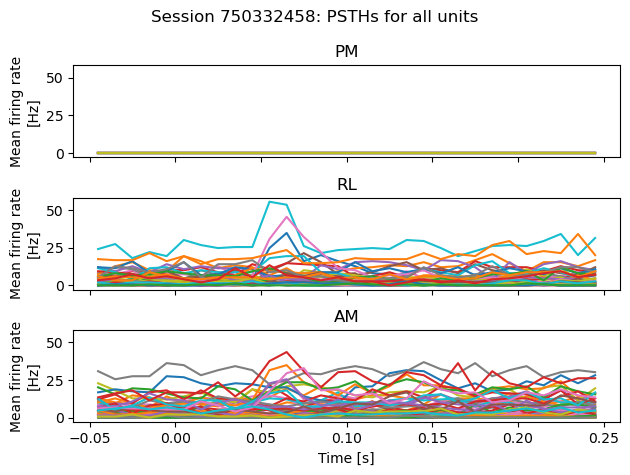

In [13]:
fig, ax = plt.subplots(3, 1, sharey=True, sharex=True)
for i,bin_center in enumerate(bin_centers_pm):
    ax[0].plot(bin_center, psths_pm[i])
for i,bin_center in enumerate(bin_centers_rl):
    ax[1].plot(bin_center, psths_rl[i])
for i,bin_center in enumerate(bin_centers_am):
    ax[2].plot(bin_center, psths_am[i])
ax[0].set(title='PM', ylabel='Mean firing rate\n[Hz]')
ax[1].set(title='RL', ylabel='Mean firing rate\n[Hz]')
ax[2].set(title='AM', xlabel='Time [s]', ylabel='Mean firing rate\n[Hz]')
fig.set_tight_layout(True)
fig.suptitle(f"Session {sess_num}: PSTHs for all units");

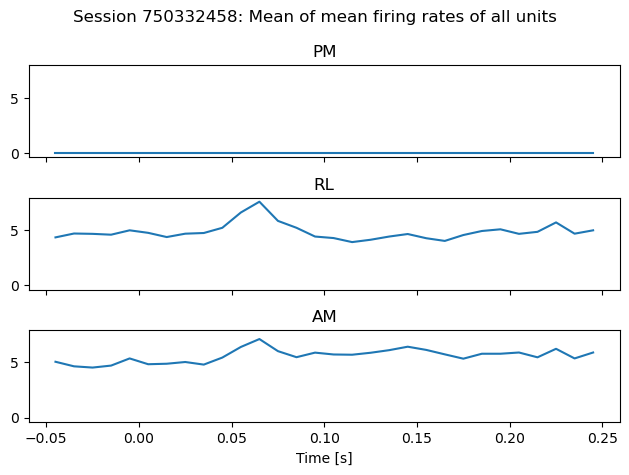

In [14]:
mean_psth_pm = np.mean(psths_pm, axis=0)  
mean_psth_rl = np.mean(psths_rl, axis=0)  
mean_psth_am = np.mean(psths_am, axis=0)  

fig, ax = plt.subplots(3, 1, sharey=True, sharex=True)
ax[0].plot(bin_centers_pm[0], mean_psth_pm)
ax[1].plot(bin_centers_rl[0], mean_psth_rl)
ax[2].plot(bin_centers_am[0], mean_psth_am)
ax[0].set(title='PM')
ax[1].set(title='RL')
ax[2].set(title='AM', xlabel='Time [s]')
fig.set_tight_layout(True)
fig.suptitle(f"Session {sess_num}: Mean of mean firing rates of all units");

## Session 754312389

In [15]:
# setting basic data paths
sess_num = 754312389
ses = root/"data"/f"ses_{sess_num}"

In [16]:
# accessing units from pm, rl, and am
units = pd.read_csv(ses/f"{ses.name}_units.csv", index_col=0)
units_pm = units[units.ecephys_structure_acronym == "VISpm"]
units_rl = units[units.ecephys_structure_acronym == "VISrl"]
units_am = units[units.ecephys_structure_acronym == "VISam"]

In [17]:
# stimulus selections
stim_name = 'flashes'
stimuli = pd.read_csv(ses/f"{ses.name}_stimuli.csv", index_col=0)
stimuli = stimuli[stimuli.stimulus_name==stim_name]
stim_times = np.asarray(stimuli.start_time)

In [18]:
# spike times
spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
spike_times = spike_times.item()

In [19]:
# some basic info
print(f"Number of trials with flash stimuls : {len(stim_times)}")
print(f"Number of Units in PM : {len(units_pm.index)}")
print(f"Number of Units in RL : {len(units_rl.index)}")
print(f"Number of Units in AM : {len(units_am.index)}")

Number of trials with flash stimuls : 150
Number of Units in PM : 22
Number of Units in RL : 41
Number of Units in AM : 64


In [20]:
bin_centers_pm = []
psths_pm = []

bin_centers_rl = []
psths_rl = []

bin_centers_am = []
psths_am = []

for unit_num in units_pm.index:
    spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
    spike_times = spike_times.item()
    spike_times_one_unit = spike_times[unit_num]
    bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.05, 0.25), bin_width=0.01)
    bin_centers_pm.append(bin_centers)
    psths_pm.append(psth)

for unit_num in units_rl.index:
    spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
    spike_times = spike_times.item()
    spike_times_one_unit = spike_times[unit_num]
    bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.05, 0.25), bin_width=0.01)
    bin_centers_rl.append(bin_centers)
    psths_rl.append(psth)

for unit_num in units_am.index:
    spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
    spike_times = spike_times.item()
    spike_times_one_unit = spike_times[unit_num]
    bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.05, 0.25), bin_width=0.01)
    bin_centers_am.append(bin_centers)
    psths_am.append(psth)

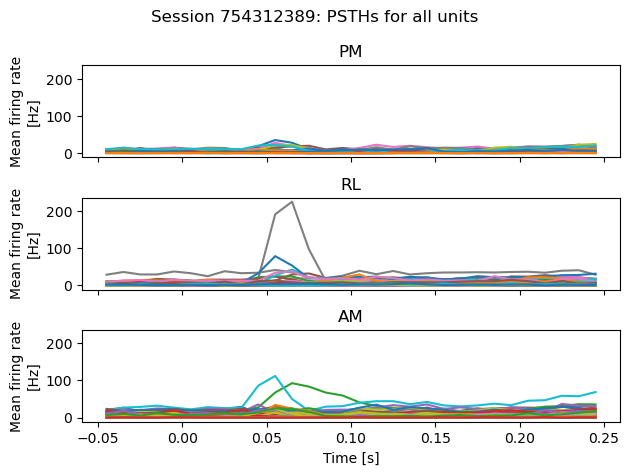

In [21]:
fig, ax = plt.subplots(3, 1, sharey=True, sharex=True)
for i,bin_center in enumerate(bin_centers_pm):
    ax[0].plot(bin_center, psths_pm[i])
for i,bin_center in enumerate(bin_centers_rl):
    ax[1].plot(bin_center, psths_rl[i])
for i,bin_center in enumerate(bin_centers_am):
    ax[2].plot(bin_center, psths_am[i])
ax[0].set(title='PM', ylabel='Mean firing rate\n[Hz]')
ax[1].set(title='RL', ylabel='Mean firing rate\n[Hz]')
ax[2].set(title='AM', xlabel='Time [s]', ylabel='Mean firing rate\n[Hz]')
fig.set_tight_layout(True)
fig.suptitle(f"Session {sess_num}: PSTHs for all units");

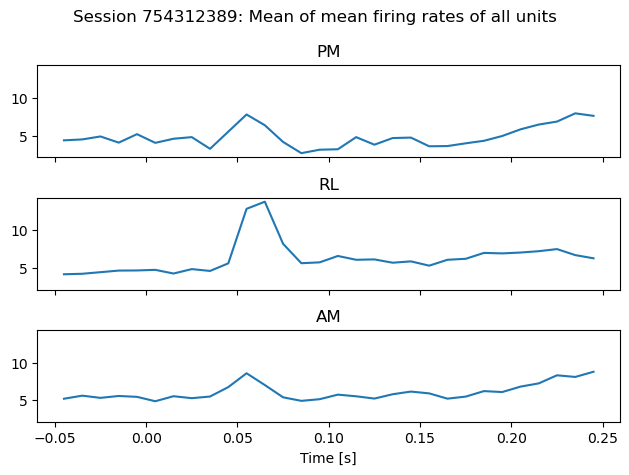

In [22]:
mean_psth_pm = np.mean(psths_pm, axis=0)  
mean_psth_rl = np.mean(psths_rl, axis=0)  
mean_psth_am = np.mean(psths_am, axis=0)  

fig, ax = plt.subplots(3, 1, sharey=True, sharex=True)
ax[0].plot(bin_centers_pm[0], mean_psth_pm)
ax[1].plot(bin_centers_rl[0], mean_psth_rl)
ax[2].plot(bin_centers_am[0], mean_psth_am)
ax[0].set(title='PM')
ax[1].set(title='RL')
ax[2].set(title='AM', xlabel='Time [s]')
fig.set_tight_layout(True)
fig.suptitle(f"Session {sess_num}: Mean of mean firing rates of all units");

## Session 754829445

In [23]:
# setting basic data paths
sess_num = 754829445
ses = root/"data"/f"ses_{sess_num}"

In [24]:
# accessing units from pm, rl, and am
units = pd.read_csv(ses/f"{ses.name}_units.csv", index_col=0)
units_pm = units[units.ecephys_structure_acronym == "VISpm"]
units_rl = units[units.ecephys_structure_acronym == "VISrl"]
units_am = units[units.ecephys_structure_acronym == "VISam"]

In [25]:
# stimulus selections
stim_name = 'flashes'
stimuli = pd.read_csv(ses/f"{ses.name}_stimuli.csv", index_col=0)
stimuli = stimuli[stimuli.stimulus_name==stim_name]
stim_times = np.asarray(stimuli.start_time)

In [26]:
# spike times
spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
spike_times = spike_times.item()

In [27]:
# some basic info
print(f"Number of trials with flash stimuls : {len(stim_times)}")
print(f"Number of Units in PM : {len(units_pm.index)}")
print(f"Number of Units in RL : {len(units_rl.index)}")
print(f"Number of Units in AM : {len(units_am.index)}")

Number of trials with flash stimuls : 150
Number of Units in PM : 21
Number of Units in RL : 32
Number of Units in AM : 47


In [28]:
bin_centers_pm = []
psths_pm = []

bin_centers_rl = []
psths_rl = []

bin_centers_am = []
psths_am = []

for unit_num in units_pm.index:
    spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
    spike_times = spike_times.item()
    spike_times_one_unit = spike_times[unit_num]
    bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.05, 0.25), bin_width=0.01)
    bin_centers_pm.append(bin_centers)
    psths_pm.append(psth)

for unit_num in units_rl.index:
    spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
    spike_times = spike_times.item()
    spike_times_one_unit = spike_times[unit_num]
    bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.05, 0.25), bin_width=0.01)
    bin_centers_rl.append(bin_centers)
    psths_rl.append(psth)

for unit_num in units_am.index:
    spike_times = np.load(ses/f"{ses.name}_spike_times.npy", allow_pickle=True)
    spike_times = spike_times.item()
    spike_times_one_unit = spike_times[unit_num]
    bin_centers, psth = compute_psth(spike_times_one_unit, stim_times, window=(-0.05, 0.25), bin_width=0.01)
    bin_centers_am.append(bin_centers)
    psths_am.append(psth)

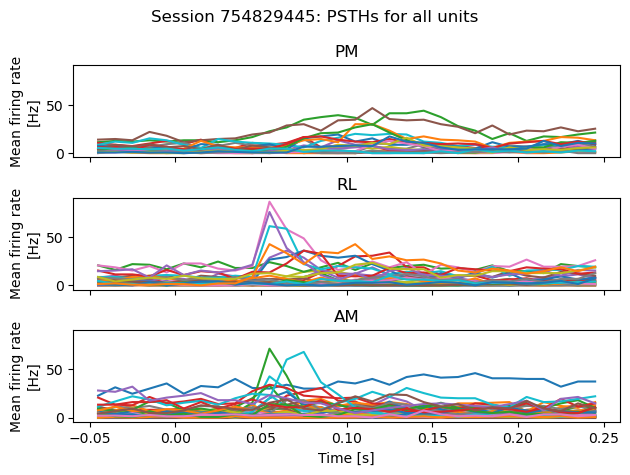

In [29]:
fig, ax = plt.subplots(3, 1, sharey=True, sharex=True)
for i,bin_center in enumerate(bin_centers_pm):
    ax[0].plot(bin_center, psths_pm[i])
for i,bin_center in enumerate(bin_centers_rl):
    ax[1].plot(bin_center, psths_rl[i])
for i,bin_center in enumerate(bin_centers_am):
    ax[2].plot(bin_center, psths_am[i])
ax[0].set(title='PM', ylabel='Mean firing rate\n[Hz]')
ax[1].set(title='RL', ylabel='Mean firing rate\n[Hz]')
ax[2].set(title='AM', xlabel='Time [s]', ylabel='Mean firing rate\n[Hz]')
fig.set_tight_layout(True)
fig.suptitle(f"Session {sess_num}: PSTHs for all units");

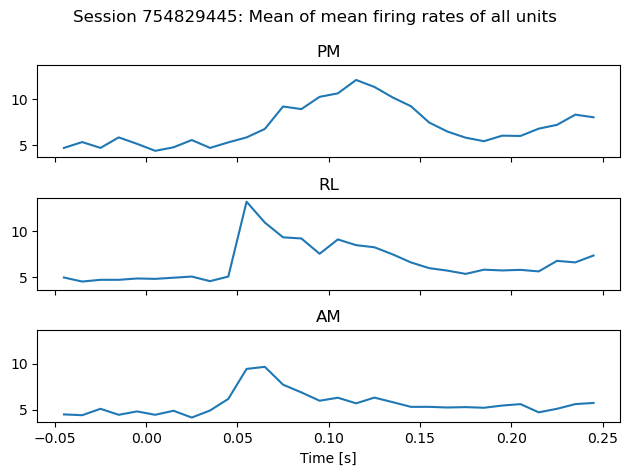

In [30]:
mean_psth_pm = np.mean(psths_pm, axis=0)  
mean_psth_rl = np.mean(psths_rl, axis=0)  
mean_psth_am = np.mean(psths_am, axis=0)  

fig, ax = plt.subplots(3, 1, sharey=True, sharex=True)
ax[0].plot(bin_centers_pm[0], mean_psth_pm)
ax[1].plot(bin_centers_rl[0], mean_psth_rl)
ax[2].plot(bin_centers_am[0], mean_psth_am)
ax[0].set(title='PM')
ax[1].set(title='RL')
ax[2].set(title='AM', xlabel='Time [s]')
fig.set_tight_layout(True)
fig.suptitle(f"Session {sess_num}: Mean of mean firing rates of all units");